In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error as rmse

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Dibimbing BI/laptop_prices.csv')

- Company: Laptop Manufacturer.
- Product: Brand and Model.
- TypeName: Laptop Type (Notebook, Ultrabook, Gaming, …etc).
- Inches: Screen Size.
- Ram: Total amount of RAM in laptop (GBs).
- OS: Operating System installed.
- Weight: Laptop Weight in kilograms.
- Price_euros: Price of Laptop in Euros. (Target)
- Screen: screen definition (Standard, Full HD, 4K Ultra HD, Quad HD+).
- ScreenW: screen width (pixels).
- ScreenH: screen height (pixels).
- Touchscreen: whether or not the laptop has a touchscreen.
- IPSpanel: whether or not the laptop has an IPSpanel.
- RetinaDisplay: whether or not the laptop has retina display.
- CPU_company
- CPU_freq: frequency of laptop CPU (Hz).
- CPU_model
- PrimaryStorage: primary storage space (GB).
- PrimaryStorageType: primary storage type (HDD, SSD, Flash Storage, Hybrid).
- SecondaryStorage: secondary storage space if any (GB).
- SecondaryStorageType: secondary storage type (HDD, SSD, Hybrid, None).
- GPU_company
- GPU_model

In [ ]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [ ]:
# menghitung missing values
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [ ]:
df[df.duplicated()]

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model


 # Correlation

## Menjadikan dataset menjadi data numerik

In [ ]:
df_korelasi = df.select_dtypes(exclude=object)

In [ ]:
df_korelasi

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
0,13.3,8,1.37,1339.69,2560,1600,2.3,128,0
1,13.3,8,1.34,898.94,1440,900,1.8,128,0
2,15.6,8,1.86,575.00,1920,1080,2.5,256,0
3,15.4,16,1.83,2537.45,2880,1800,2.7,512,0
4,13.3,8,1.37,1803.60,2560,1600,3.1,256,0
...,...,...,...,...,...,...,...,...,...
1270,14.0,4,1.80,638.00,1920,1080,2.5,128,0
1271,13.3,16,1.30,1499.00,3200,1800,2.5,512,0
1272,14.0,2,1.50,229.00,1366,768,1.6,64,0
1273,15.6,6,2.19,764.00,1366,768,2.5,1024,0


## Mencari Unique

In [ ]:
df_korelasi['Ram'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64])

In [ ]:
df_korelasi['ScreenH'].unique()

array([1600,  900, 1080, 1800,  768, 1440, 1200, 1504, 2160, 1824])

In [ ]:
df_korelasi['ScreenW'].unique()

array([2560, 1440, 1920, 2880, 1366, 2304, 3200, 2256, 3840, 2160, 1600,
       2736, 2400])

In [ ]:
df_korelasi['CPU_freq'].unique()

array([2.3 , 1.8 , 2.5 , 2.7 , 3.1 , 3.  , 2.2 , 1.6 , 2.  , 2.8 , 1.2 ,
       2.9 , 2.4 , 1.44, 1.5 , 1.9 , 1.1 , 1.3 , 2.6 , 3.6 , 3.2 , 1.  ,
       2.1 , 0.9 , 1.92])

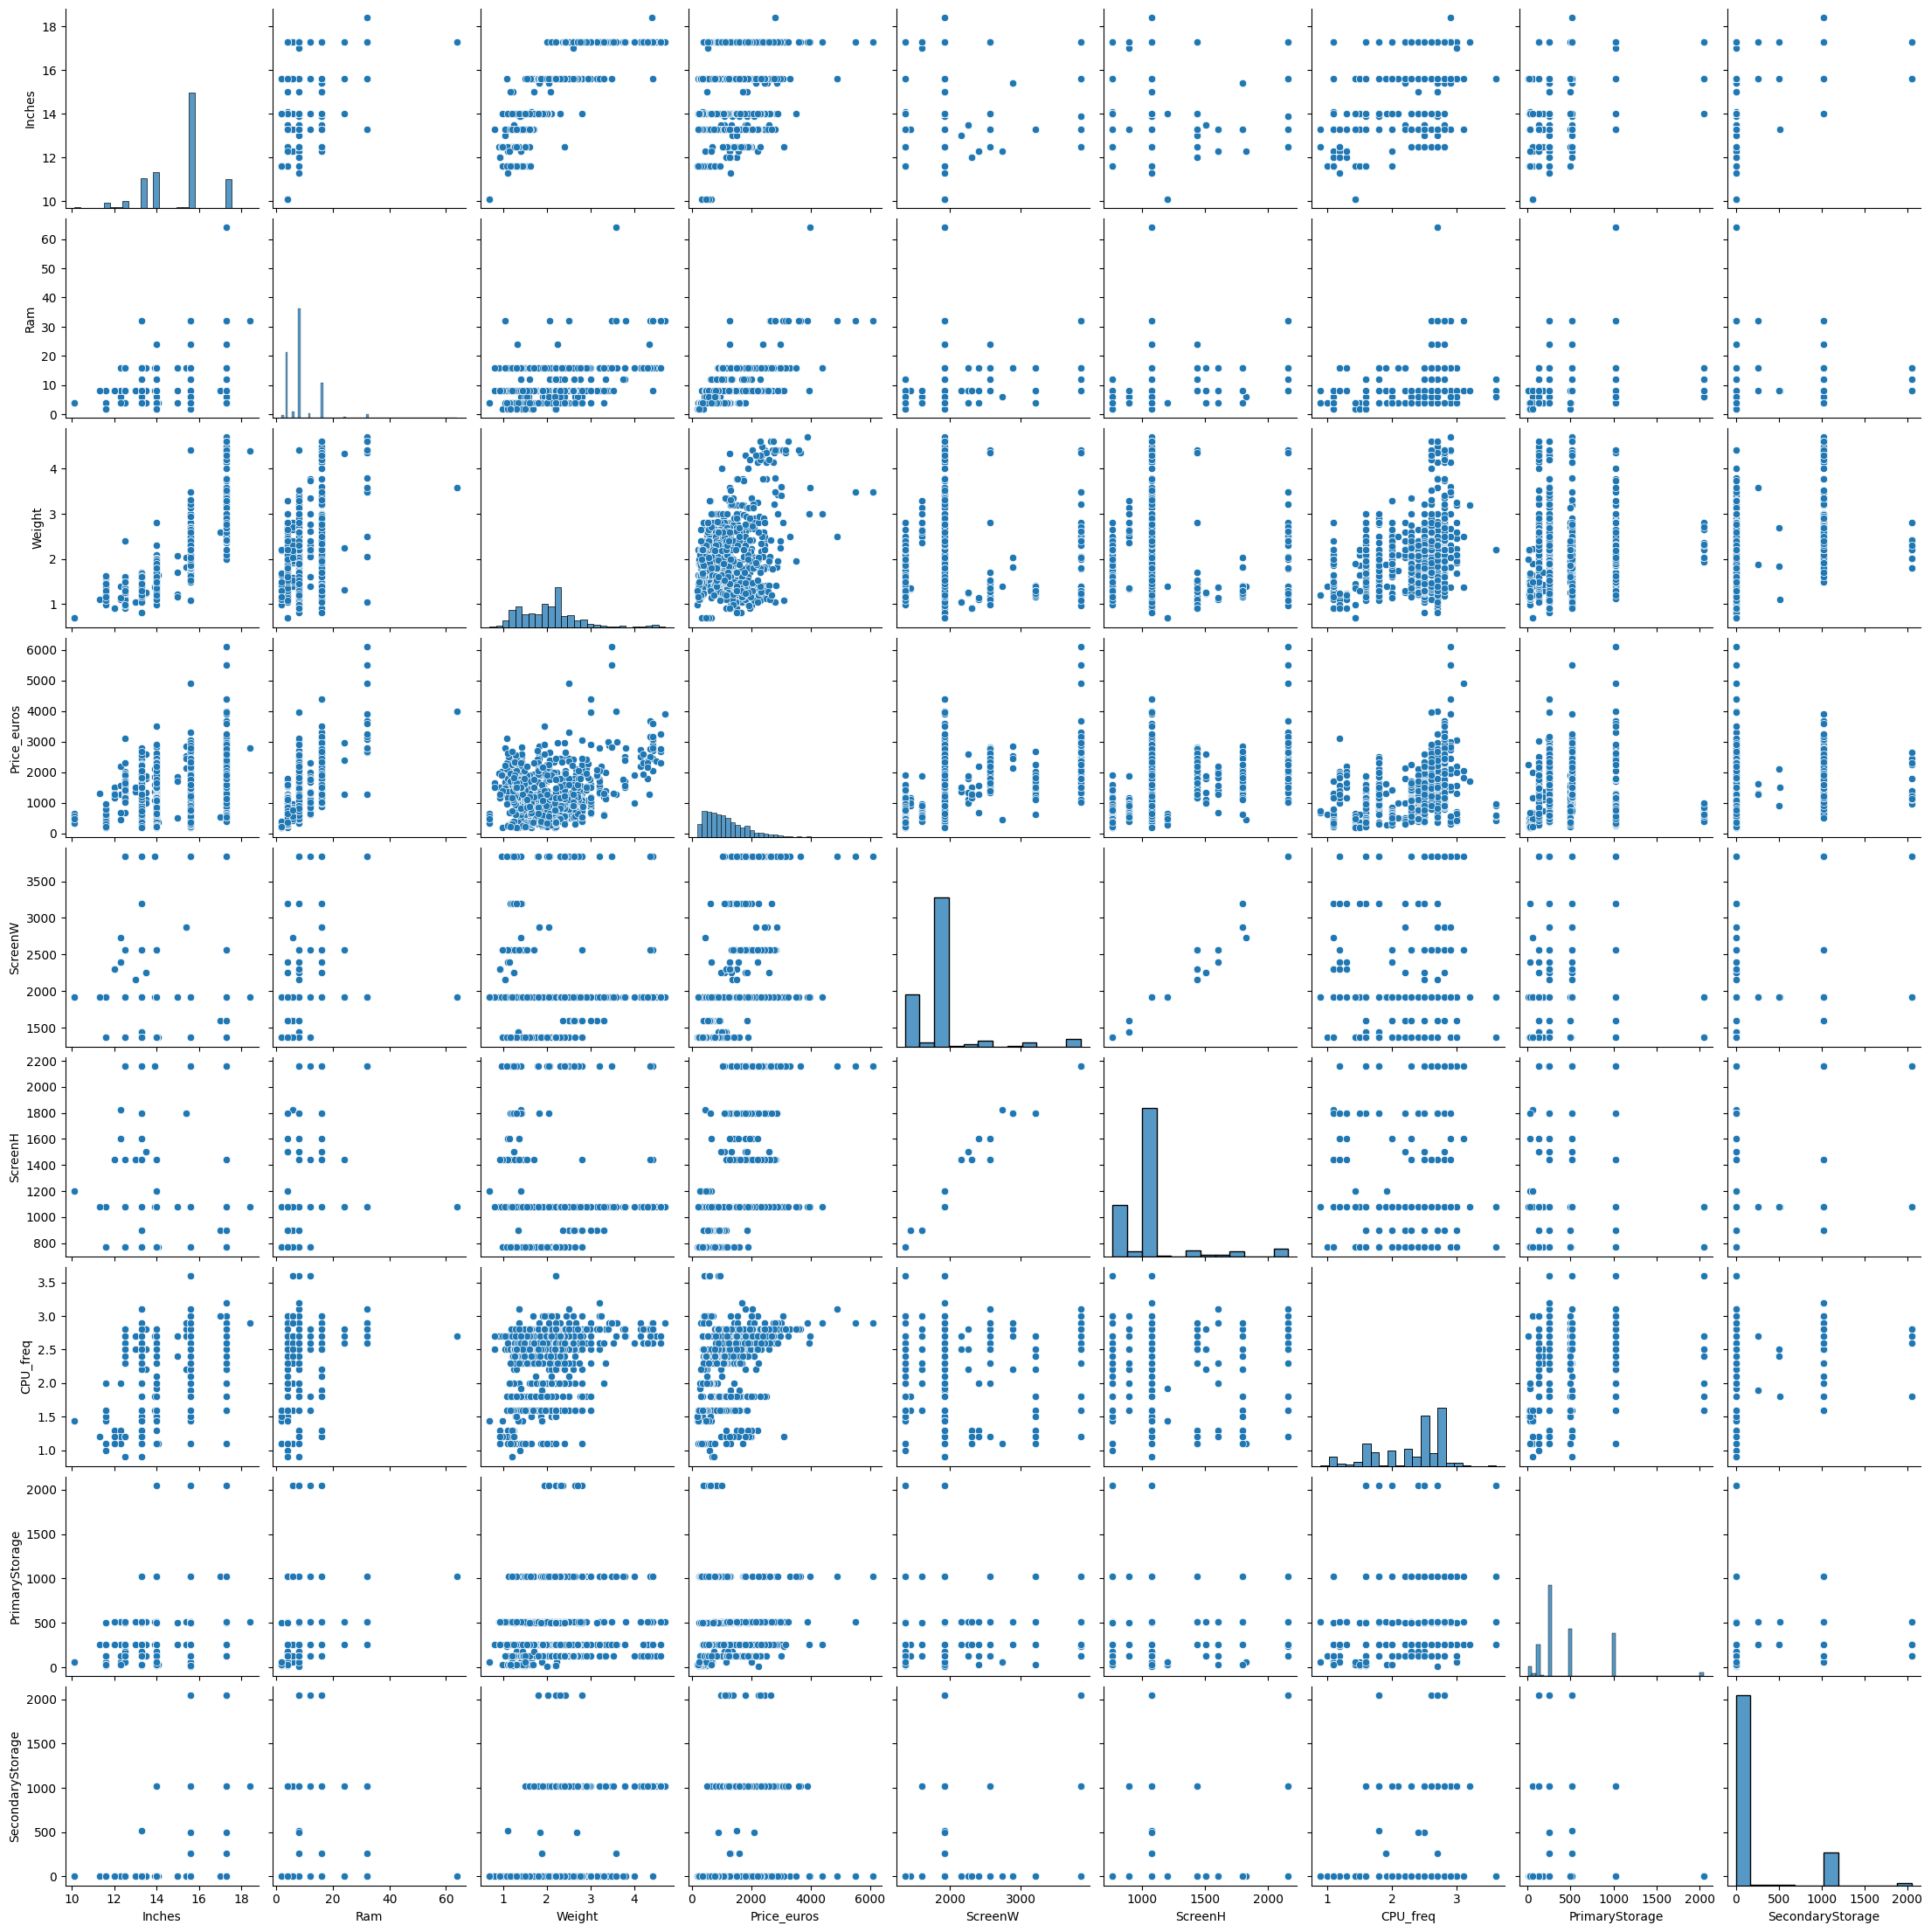

In [ ]:
# melihat visualisasi untuk tiap kolom
sns.pairplot(df_korelasi)

In [ ]:
# mencari nilai korelasi
df_korelasi.corr()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
Inches,1.000000,0.241078,0.826638,0.066608,-0.068223,-0.093062,0.305037,0.264280,0.389067
Ram,0.241078,1.000000,0.389370,0.740287,0.424089,0.415241,0.366254,0.015365,0.390939
Weight,0.826638,0.389370,1.000000,0.211883,-0.028605,-0.050106,0.318649,0.175433,0.481495
Price_euros,0.066608,0.740287,0.211883,1.000000,0.552491,0.548529,0.428847,-0.124775,0.291207
ScreenW,-0.068223,0.424089,-0.028605,0.552491,1.000000,0.994069,0.178659,-0.072977,0.146232
ScreenH,-0.093062,0.415241,-0.050106,0.548529,0.994069,1.000000,0.164369,-0.080135,0.135293
CPU_freq,0.305037,0.366254,0.318649,0.428847,0.178659,0.164369,1.000000,0.056320,0.224521
PrimaryStorage,0.264280,0.015365,0.175433,-0.124775,-0.072977,-0.080135,0.056320,1.000000,-0.244182
SecondaryStorage,0.389067,0.390939,0.481495,0.291207,0.146232,0.135293,0.224521,-0.244182,1.000000


<Axes: >

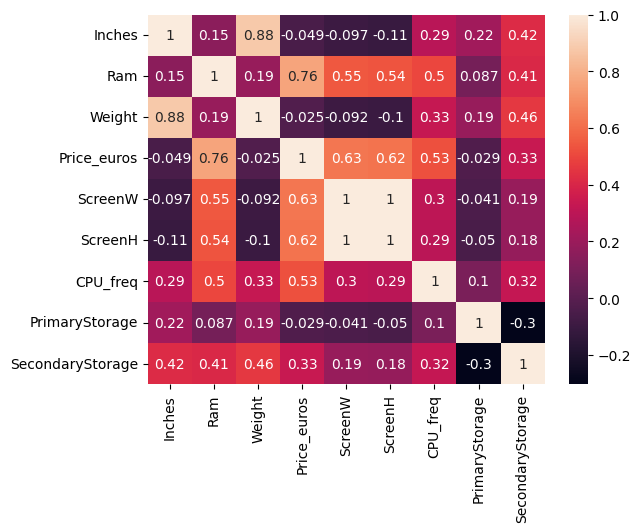

In [ ]:
sns.heatmap(df_korelasi.corr('spearman'), annot=True)

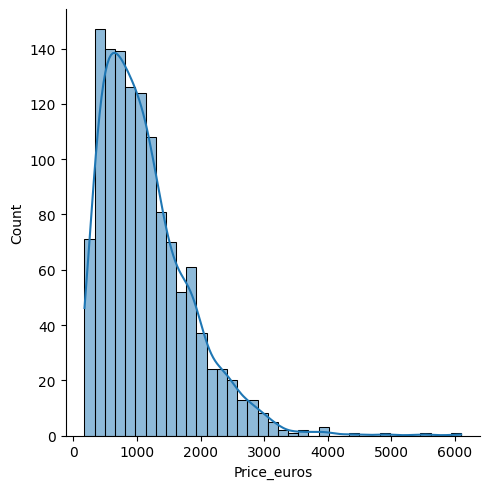

In [ ]:
# melihat distribusi data
sns.displot(df_korelasi, x='Price_euros', kde=True)

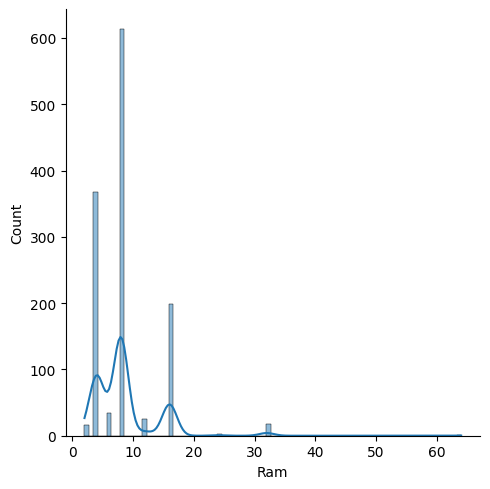

In [ ]:
sns.displot(df_korelasi, x='Ram', kde=True)

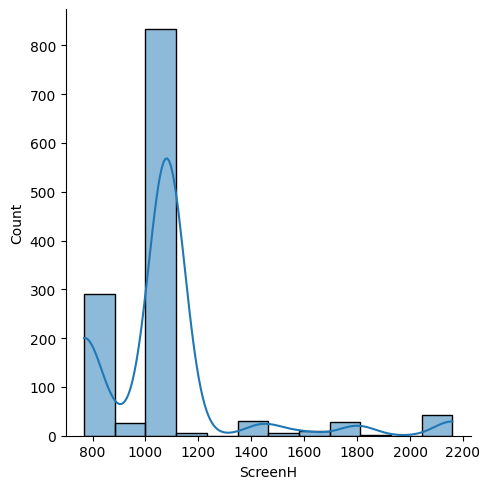

In [ ]:
sns.displot(df_korelasi, x='ScreenH', kde=True)

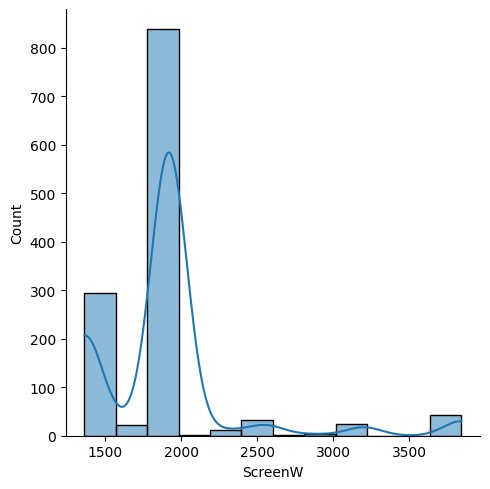

In [ ]:
sns.displot(df_korelasi, x='ScreenW', kde=True)

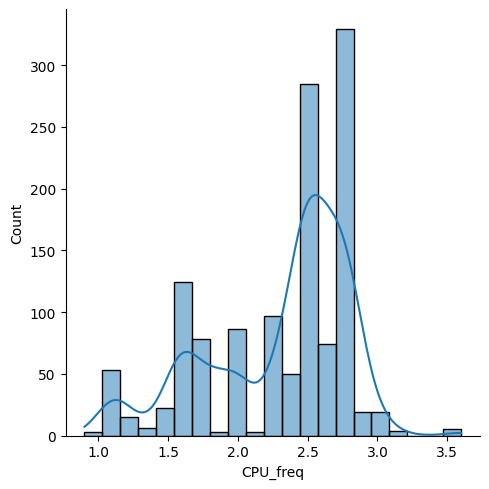

In [ ]:
sns.displot(df_korelasi, x='CPU_freq', kde=True)

<Axes: xlabel='Ram', ylabel='Price_euros'>

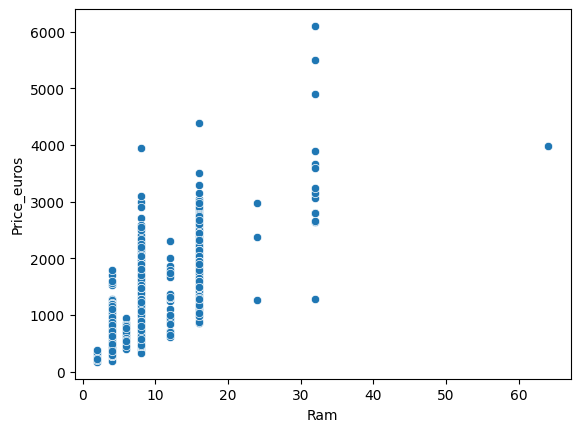

In [ ]:
# melihat hubungan antar kolom dari visualisasi
sns.scatterplot(df_korelasi, x='Ram', y='Price_euros')

<Axes: xlabel='CPU_freq', ylabel='Price_euros'>

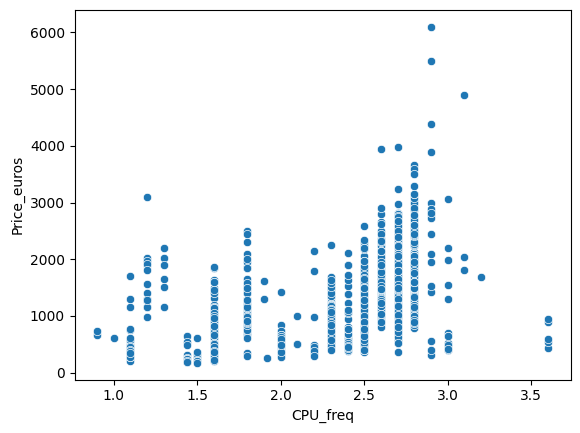

In [ ]:
sns.scatterplot(df_korelasi, x='CPU_freq', y='Price_euros')

## Korelasi pearson, kendall dan spearman

In [ ]:
df_korelasi.corr('pearson')['Price_euros']

,Price_euros
Inches,0.066608
Ram,0.740287
Weight,0.211883
Price_euros,1.000000
ScreenW,0.552491
ScreenH,0.548529
CPU_freq,0.428847
PrimaryStorage,-0.124775
SecondaryStorage,0.291207


In [ ]:
df_korelasi.corr('kendall')['Price_euros']

,Price_euros
Inches,-0.039834
Ram,0.632612
Weight,-0.012989
Price_euros,1.000000
ScreenW,0.510442
ScreenH,0.501056
CPU_freq,0.396566
PrimaryStorage,-0.013735
SecondaryStorage,0.271314


In [ ]:
df_korelasi.corr('spearman')['Price_euros']

,Price_euros
Inches,-0.049101
Ram,0.764248
Weight,-0.025026
Price_euros,1.000000
ScreenW,0.627097
ScreenH,0.616516
CPU_freq,0.526273
PrimaryStorage,-0.029112
SecondaryStorage,0.334870


# Chi-Square

In [ ]:
# Langsung memfilter kolom bertipe object dan mencetak unique values
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 40)


Unique values in column 'Company':
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
----------------------------------------
Unique values in column 'Product':
['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)'
 'Inspiron 7577' 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce'
 'Aspire A515-51G' 'Inspiron 7773' 'IdeaPad 320-15ISK' 'Rog Strix'
 'X751NV-TY001T (N4200/4GB/1TB/GeForce' 'Yoga Book' 'ProBook 430'
 'Inspiron 3576' '15-bs002nv (i3-6006U/

## memilih kolom yang ingin dilakukan chi-square test

In [ ]:
# dipilihlah Typename dan Screen
df_chi = pd.crosstab(df['TypeName'], df['Screen'])

In [ ]:
df_chi

Screen,4K Ultra HD,Full HD,Quad HD+,Standard
TypeName,,,,
2 in 1 Convertible,7,76,7,27
Gaming,13,190,0,2
Netbook,0,4,0,19
Notebook,11,418,3,275
Ultrabook,8,123,18,45
Workstation,4,24,0,1


## dilakukan Chi-Square test pada kolom yang sudah dipilih

In [ ]:
stat, p, dof, expected = chi2_contingency(df_chi)

In [ ]:
stat

242.49352450447054

In [ ]:
p

4.351535922700308e-43

In [ ]:
dof

15

In [ ]:
expected

array([[  3.94588235,  76.62352941,   2.56941176,  33.86117647],
       [  6.91372549, 134.25490196,   4.50196078,  59.32941176],
       [  0.77568627,  15.0627451 ,   0.50509804,   6.65647059],
       [ 23.84392157, 463.01568627,  15.52627451, 204.61411765],
       [  6.5427451 , 127.05098039,   4.26039216,  56.14588235],
       [  0.97803922,  18.99215686,   0.63686275,   8.39294118]])

## menguji hipotesis dari data yang sudah didapatkan

In [ ]:
alpha = 0.05
if p < alpha:
    print("\nHipotesis nol ditolak: Ada hubungan yang signifikan antara TypeName dan Screen.")
else:
    print("\nHipotesis nol tidak ditolak: Tidak ada hubungan yang signifikan antara TypeName dan Screen.")


Hipotesis nol ditolak: Ada hubungan yang signifikan antara TypeName dan Screen.


# Linear Regression

In [ ]:
y = df['Price_euros'] # target
x = df['Ram'].values.reshape(-1,1) # Prediktor

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x,y)

LinearRegression()

In [ ]:
model.coef_

array([101.76089391])

In [ ]:
model.intercept_

276.02730172390227

In [ ]:
# price_euros = 101*ram + 276

In [ ]:
df['predicted_price'] = model.predict(x)

In [ ]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,predicted_price
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,1090.114453
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,1090.114453
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,1090.114453
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,1904.201604
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,1090.114453


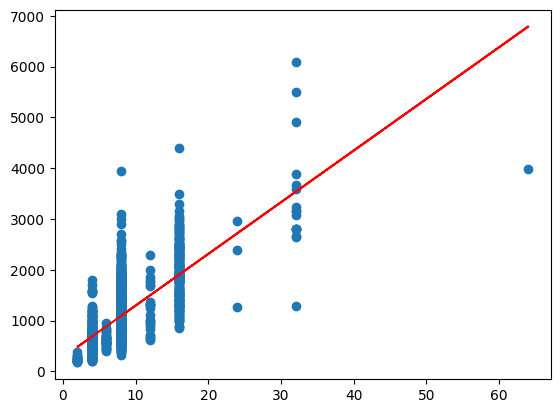

In [ ]:
plt.scatter(df['Ram'], df['Price_euros'])
plt.plot(df['Ram'],df['predicted_price'], c='red')
plt.show()

In [ ]:
rmse(df['Price_euros'], df['predicted_price'])

470.9251652164996

# Multiple Linear Regression

In [ ]:
y = df['Price_euros'] # target
x = df[['Ram', 'ScreenH', 'CPU_freq']] # Prediktor

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x,y)

LinearRegression()

In [ ]:
model.coef_

array([ 76.31624715,   0.71271091, 247.63524844])

In [ ]:
model.intercept_

-844.8823641492843

In [ ]:
df['predicted_price'] = model.predict(x)

In [ ]:
rmse(df['Price_euros'], df['predicted_price'])

416.93009489952493

# Linear Regression dengan data yang berbeda

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dibimbing BI/StudentPerformanceFactors.csv')

In [ ]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
data = data.select_dtypes(exclude=object)

In [ ]:
data.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70


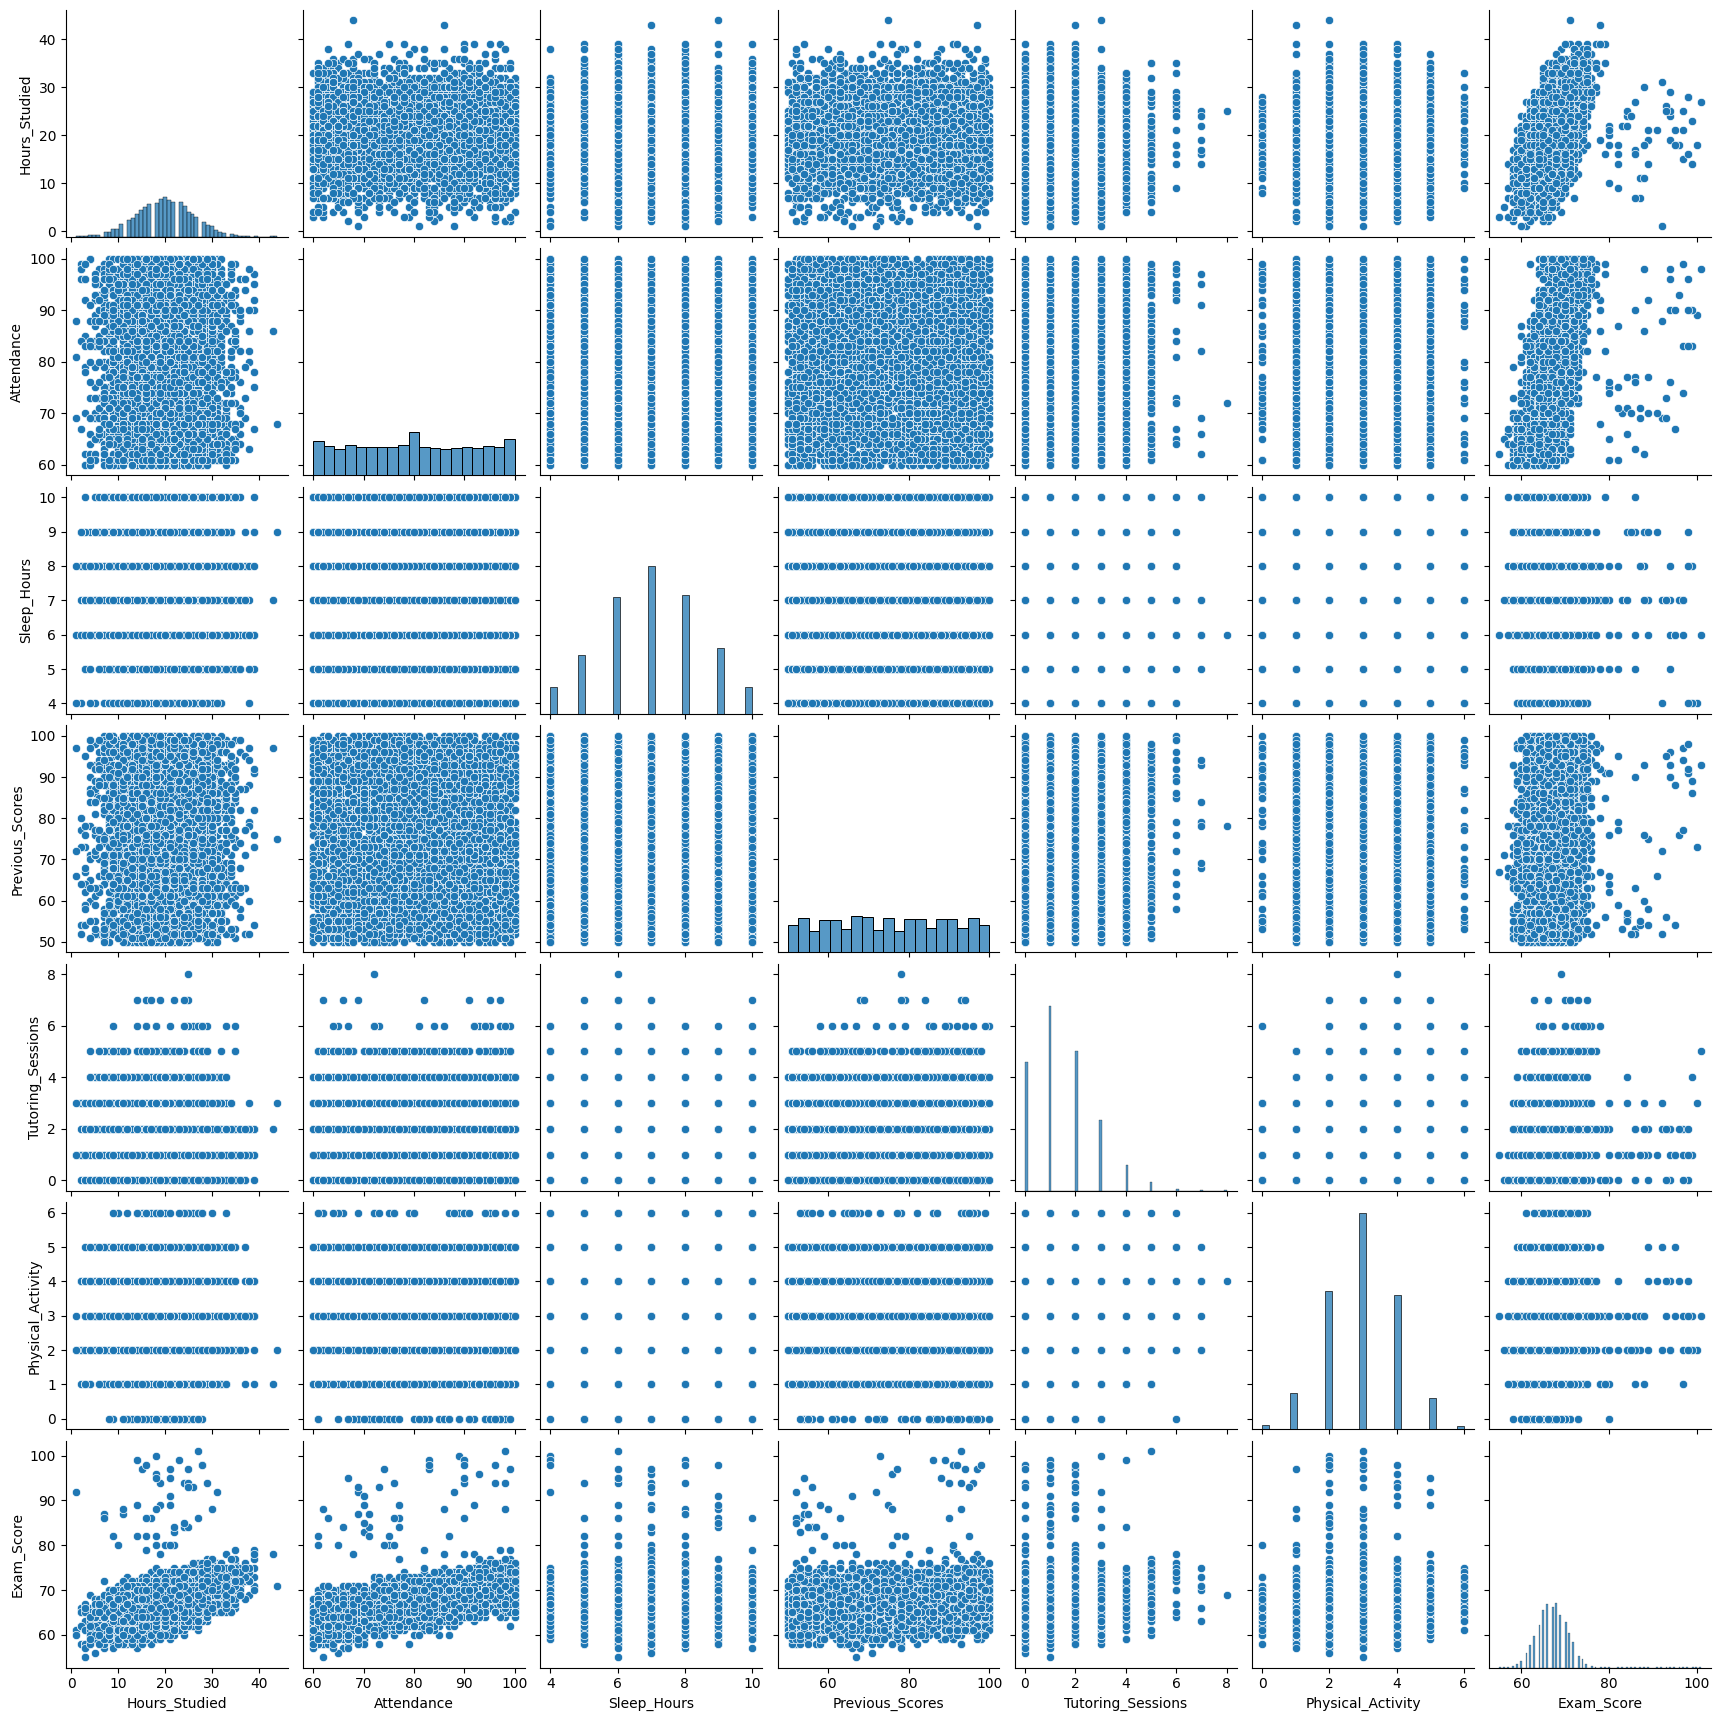

In [ ]:
sns.pairplot(data)

In [ ]:
data.corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.009908,0.010977,0.024846,-0.014282,0.004624,0.445455
Attendance,-0.009908,1.000000,-0.015918,-0.020186,0.014324,-0.022435,0.581072
Sleep_Hours,0.010977,-0.015918,1.000000,-0.021750,-0.012216,-0.000378,-0.017022
Previous_Scores,0.024846,-0.020186,-0.021750,1.000000,-0.013122,-0.011274,0.175079
Tutoring_Sessions,-0.014282,0.014324,-0.012216,-0.013122,1.000000,0.017733,0.156525
Physical_Activity,0.004624,-0.022435,-0.000378,-0.011274,0.017733,1.000000,0.027824
Exam_Score,0.445455,0.581072,-0.017022,0.175079,0.156525,0.027824,1.000000


<Axes: >

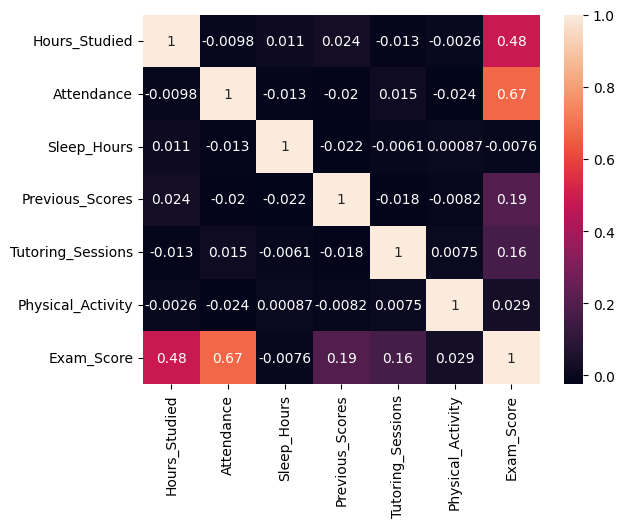

In [ ]:
sns.heatmap(data.corr('spearman'), annot=True)

<Axes: xlabel='Exam_Score', ylabel='Hours_Studied'>

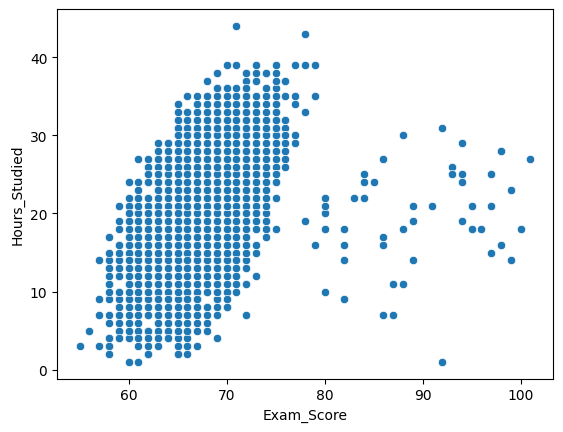

In [ ]:
sns.scatterplot(data, x='Exam_Score', y='Hours_Studied')

<Axes: xlabel='Exam_Score', ylabel='Attendance'>

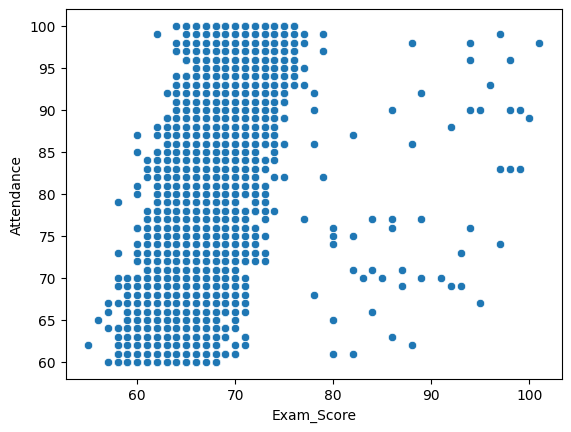

In [ ]:
sns.scatterplot(data, x='Exam_Score', y='Attendance')

In [ ]:
y = data['Exam_Score']
x = data['Attendance'].values.reshape(-1,1)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x,y)

LinearRegression()

In [ ]:
model.coef_

array([0.19576872])

In [ ]:
model.intercept_

51.57857651128337

In [ ]:
data['predicted_exam_scores'] = model.predict(x)

In [ ]:
data.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,predicted_exam_scores
0,23,84,7,73,0,3,67,68.023149
1,19,64,8,59,2,4,61,64.107775
2,24,98,7,91,2,4,74,70.763911
3,29,89,8,98,1,4,71,69.001993
4,19,92,6,65,3,4,70,69.589299


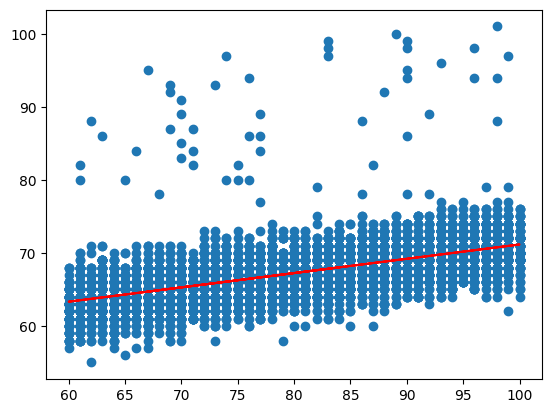

In [ ]:
plt.scatter(data['Attendance'], data['Exam_Score'])
plt.plot(data['Attendance'], data['predicted_exam_scores'], c='red')
plt.show()

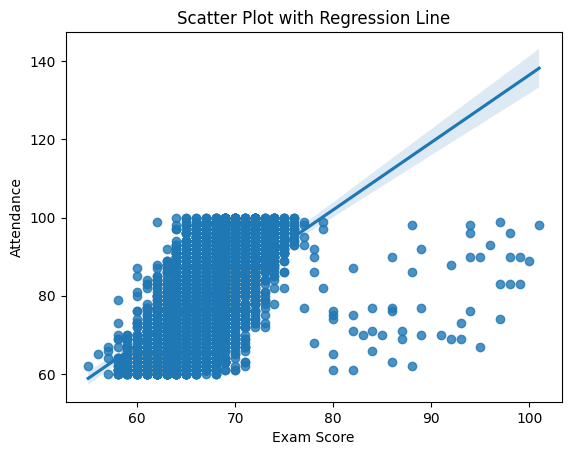

In [ ]:
sns.regplot(data, x='Exam_Score', y='Attendance')
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Exam Score')
plt.ylabel('Attendance')
plt.show()

In [ ]:
rmse(data['Exam_Score'], data['predicted_exam_scores'])

3.166016579840792

In [ ]:
y = data['Exam_Score']
x = data[['Attendance', 'Hours_Studied']]

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x,y)

LinearRegression()

In [ ]:
model.coef_

array([0.19727504, 0.29305827])

In [ ]:
model.intercept_

45.60416970273298

In [ ]:
data['predicted_exam_scores'] = model.predict(x)

In [ ]:
data.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,predicted_exam_scores
0,23,84,7,73,0,3,67,68.915613
1,19,64,8,59,2,4,61,63.797879
2,24,98,7,91,2,4,74,71.970522
3,29,89,8,98,1,4,71,71.660338
4,19,92,6,65,3,4,70,69.321580


In [ ]:
rmse(data['Exam_Score'], data['predicted_exam_scores'])

2.6348287508013026